# Выгрузки за сентябрь 2020, числа 15(вт), 16(ср), 18(пт)

In [172]:
import pandas as pd
pd.options.mode.chained_assignment = None

data_15 = pd.read_csv('Выгрузка 2020-09-15.csv')
data_16 = pd.read_csv('Выгрузка 2020-09-16.csv')
data_18 = pd.read_csv('Выгрузка 2020-09-18.csv')
data_15.head()

,ID,TYPE_ID,type_name,patient_id,CURRENT_STATUS_ID,STATUS,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,ENTRY_ID,RESOURCE_ID,resource_type
0,92695414,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",30000007879933,221798779,FINISHED,361482,2020-09-15 07:23:06.662,2020-09-15 07:29:08.144,16242908977,2.303762e+11,18892475953,AVAILABLE_RESOURCE
1,93045972,MOBILE_VACCINATION,Проведение вакцинации мобильной бригадой,30261608,222594154,FINISHED,7681,2020-09-15 15:33:01.047,2020-09-15 15:33:08.728,12812543588,NaN,18994187378,AVAILABLE_RESOURCE
2,93044268,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",17912987,222596482,FINISHED,355110,2020-09-15 15:29:24.896,2020-09-15 15:35:20.006,12367399975,NaN,19001527513,AVAILABLE_RESOURCE
3,92754003,MOBILE_VACCINATION,Проведение вакцинации мобильной бригадой,531760691,221919213,FINISHED,16670,2020-09-15 08:33:03.454,2020-09-15 08:33:20.124,10645503066,NaN,18892476007,AVAILABLE_RESOURCE
4,92718485,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",16961458,221920766,FINISHED,247677,2020-09-15 07:50:35.805,2020-09-15 08:34:09.299,12349053712,2.314757e+11,13894185,AVAILABLE_RESOURCE


In [173]:
# сопоставление типа приема англ-рус
data_15[['TYPE_ID', 'type_name']].drop_duplicates().reset_index(drop=True)

,TYPE_ID,type_name
0,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,..."
1,MOBILE_VACCINATION,Проведение вакцинации мобильной бригадой
2,MEETING_WITH_DOCTOR_AT_HOME,Вызов врача на дом
3,SAMPLING_BIOMATERIALS,Забор биоматериалов в процедурном кабинете
4,CONDUCTING_DIAGNOSTIC_TEST,Проведение инструментального исследования
5,MEETING_WITH_DUTY_DOCTOR,Прием пациента дежурным врачом (фельдшером)
6,PROCEDURE_ROOM_APPOINTMENT,Факт амбулаторного приема пациента прививочной...
7,GROUP_VACCINATION,Групповая вакцинация
8,MEETING_WITH_NURSE_IN_CE,Приём пациента медсестрой при доврачебном проф...


In [174]:
df_15 = data_15[['TYPE_ID', 'patient_id', 'DURATION', 'START_DATE', 'FINISH_DATE', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']]
df_16 = data_16[['TYPE_ID', 'patient_id', 'DURATION', 'START_DATE', 'FINISH_DATE', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']]
df_18 = data_18[['TYPE_ID', 'patient_id', 'DURATION', 'START_DATE', 'FINISH_DATE', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']]

df_15['DURATION_'] = (
    round(
        (pd.to_datetime(df_15.loc[:, 'FINISH_DATE']) -
        pd.to_datetime(df_15.loc[:, 'START_DATE'])
        ).dt.total_seconds() / 60, 2)
)
df_16['DURATION_'] = (
    round(
        (pd.to_datetime(df_16.loc[:, 'FINISH_DATE']) -
        pd.to_datetime(df_16.loc[:, 'START_DATE'])
        ).dt.total_seconds() / 60, 2)
)
df_18['DURATION_'] = (
    round(
        (pd.to_datetime(data_18.loc[:, 'FINISH_DATE']) -
        pd.to_datetime(data_18.loc[:, 'START_DATE'])
        ).dt.total_seconds() / 60, 2)
)

In [175]:
df_15['DURATION'] = round(df_15['DURATION'] / 60000, 2)
df_16['DURATION'] = round(df_16['DURATION'] / 60000, 2)
df_18['DURATION'] = round(df_18['DURATION'] / 60000, 2)

## 1. Распределение длительности приемов в минутах.

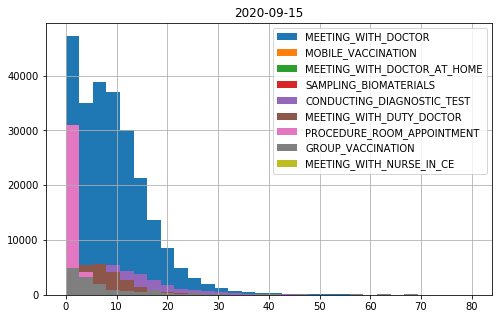

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.title('2020-09-15')
for col in df_15.TYPE_ID.unique():
    df_15[df_15['TYPE_ID'] == col]['DURATION'].hist(bins=30, range=(0, 80), label=col)
plt.legend();

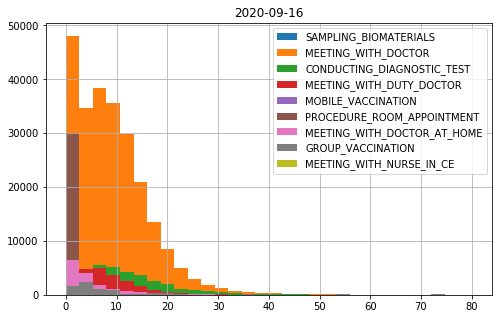

In [180]:
plt.figure(figsize=(8, 5))
plt.title('2020-09-16')
for col in df_16.TYPE_ID.unique():
    df_16[df_16['TYPE_ID'] == col]['DURATION'].hist(bins=30, range=(0, 80), label=col)
plt.legend();

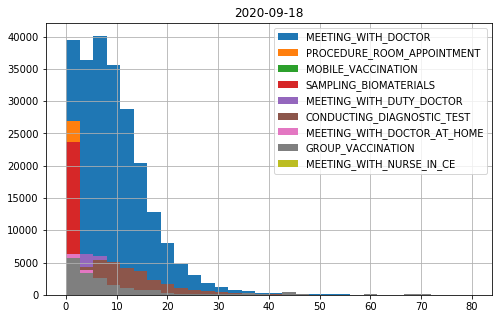

In [181]:
plt.figure(figsize=(8, 5))
plt.title('2020-09-18')
for col in df_18.TYPE_ID.unique():
    df_18[df_18['TYPE_ID'] == col]['DURATION'].hist(bins=30, range=(0, 80), label=col)
plt.legend();

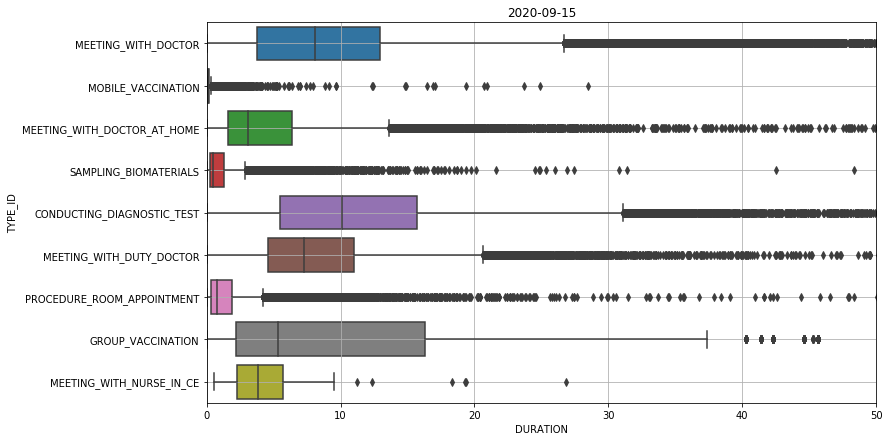

In [182]:
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.xlim(0, 50)
sns.boxplot(y='TYPE_ID', x='DURATION', data=df_15[['TYPE_ID', 'DURATION']])
plt.title('2020-09-15')
plt.grid()

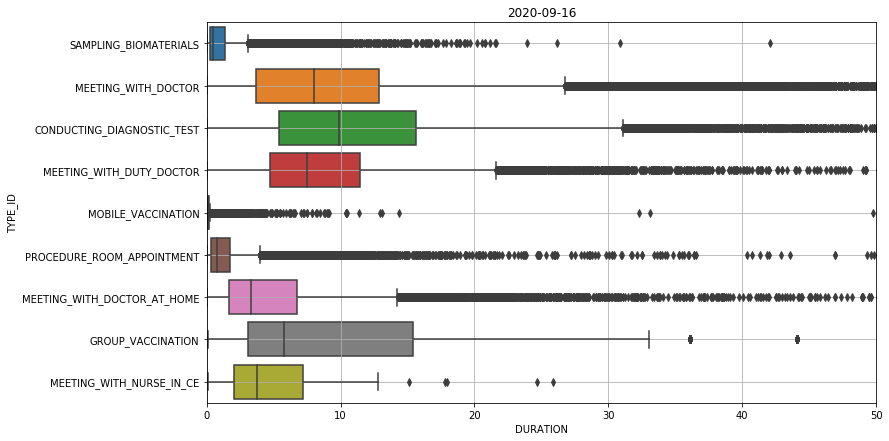

In [183]:
plt.figure(figsize=(12, 7))
plt.xlim(0, 50)
sns.boxplot(y='TYPE_ID', x='DURATION', data=df_16[['TYPE_ID', 'DURATION']])
plt.title('2020-09-16')
plt.grid()

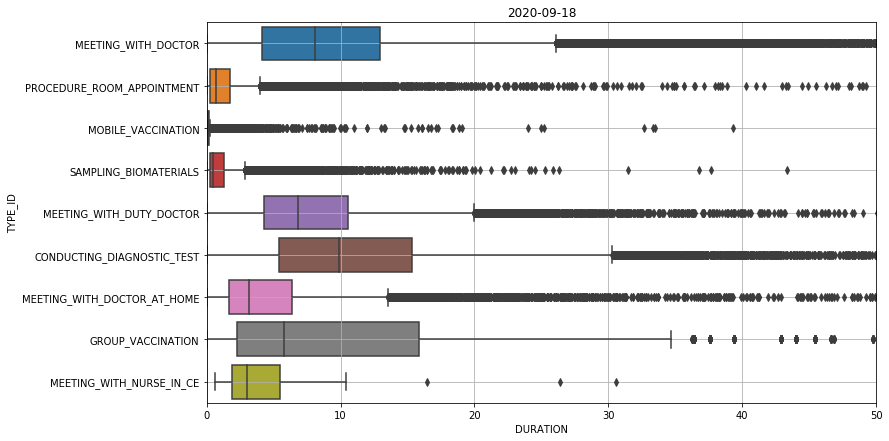

In [184]:
plt.figure(figsize=(12, 7))
plt.xlim(0, 50)
sns.boxplot(y='TYPE_ID', x='DURATION', data=df_18[['TYPE_ID', 'DURATION']])
plt.title('2020-09-18')
plt.grid()

#### Средняя продолжительность приемов в минутах.

In [185]:
#берем медиану, т.к. выбросы
df_15.groupby('TYPE_ID', as_index=False).DURATION.median()\
    .merge(df_16.groupby('TYPE_ID').DURATION.median(), on='TYPE_ID')\
    .merge(df_18.groupby('TYPE_ID').DURATION.median(), on='TYPE_ID')\
    .set_axis(['TYPE_ID', '2020-09-15', '2020-09-16', '2020-09-18'], axis=1)

,TYPE_ID,2020-09-15,2020-09-16,2020-09-18
0,CONDUCTING_DIAGNOSTIC_TEST,10.08,9.90,9.875
1,GROUP_VACCINATION,5.35,5.79,5.810
2,MEETING_WITH_DOCTOR,8.11,8.03,8.110
3,MEETING_WITH_DOCTOR_AT_HOME,3.12,3.33,3.160
4,MEETING_WITH_DUTY_DOCTOR,7.26,7.51,6.860
5,MEETING_WITH_NURSE_IN_CE,3.86,3.74,2.990
6,MOBILE_VACCINATION,0.11,0.11,0.110
7,PROCEDURE_ROOM_APPOINTMENT,0.80,0.74,0.720
8,SAMPLING_BIOMATERIALS,0.50,0.50,0.490


In [186]:
#процентное соотношение типов приемов
pd.concat([df_15.TYPE_ID.value_counts(normalize=True), 
           df_16.TYPE_ID.value_counts(normalize=True),
          df_18.TYPE_ID.value_counts(normalize=True)], axis=1)\
    .set_axis(['2020-09-15', '2020-09-16', '2020-09-18'], axis=1)

,2020-09-15,2020-09-16,2020-09-18
MEETING_WITH_DOCTOR,0.576927,0.591199,0.578094
PROCEDURE_ROOM_APPOINTMENT,0.087121,0.085893,0.078302
CONDUCTING_DIAGNOSTIC_TEST,0.085215,0.087784,0.085805
SAMPLING_BIOMATERIALS,0.062983,0.065450,0.065065
MEETING_WITH_DUTY_DOCTOR,0.055775,0.052806,0.060664
MOBILE_VACCINATION,0.052240,0.058291,0.047503
MEETING_WITH_DOCTOR_AT_HOME,0.041693,0.037960,0.036198
GROUP_VACCINATION,0.037905,0.020414,0.048280
MEETING_WITH_NURSE_IN_CE,0.000141,0.000204,0.000088


In [187]:
#процентное соотношение приемов дольше 1 часа
pd.concat([df_15[df_15['DURATION'] >= 60].TYPE_ID.value_counts(normalize=True),
               df_16[df_16['DURATION'] >= 60].TYPE_ID.value_counts(normalize=True),
               df_18[df_18['DURATION'] >= 60].TYPE_ID.value_counts(normalize=True)], axis=1)\
    .set_axis(['2020-09-15', '2020-09-16', '2020-09-18'], axis=1)

,2020-09-15,2020-09-16,2020-09-18
GROUP_VACCINATION,0.734177,0.557594,0.733890
MEETING_WITH_DOCTOR,0.145788,0.264857,0.156722
MEETING_WITH_DOCTOR_AT_HOME,0.057617,0.078503,0.048926
CONDUCTING_DIAGNOSTIC_TEST,0.051942,0.077036,0.042959
PROCEDURE_ROOM_APPOINTMENT,0.005238,0.011005,0.006762
MEETING_WITH_DUTY_DOCTOR,0.003492,0.010271,0.008353
MOBILE_VACCINATION,0.001309,NaN,0.001193
SAMPLING_BIOMATERIALS,0.000436,0.000734,0.000796
MEETING_WITH_NURSE_IN_CE,NaN,NaN,0.000398


In [188]:
#процент приемов больше 1 часа от общего числа приемов в день
print('2020-09-15: {:.1%}'.format(df_15[df_15['DURATION'] >= 60].TYPE_ID.count() / df_15.TYPE_ID.count()))
print('2020-09-16: {:.1%}'.format(df_16[df_16['DURATION'] >= 60].TYPE_ID.count() / df_16.TYPE_ID.count()))
print('2020-09-18: {:.1%}'.format(df_18[df_18['DURATION'] >= 60].TYPE_ID.count() / df_18.TYPE_ID.count()))

2020-09-15: 0.5%
2020-09-16: 0.3%
2020-09-18: 0.6%


In [189]:
print(df_15.FINISH_DATE.max())
print(df_16.FINISH_DATE.max())
print(df_18.FINISH_DATE.max())

2020-09-25 21:00:53.579
2020-09-26 21:00:50.743
2020-09-28 21:00:47.964


In [192]:
pd.to_datetime('2020-09-15')

Timestamp('2020-09-15 00:00:00')

In [198]:
df_15[pd.to_datetime(df_15.FINISH_DATE) > pd.to_datetime('2020-09-16')].sort_values(by='DURATION', ascending=False).head(10)

,TYPE_ID,patient_id,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,DURATION_
182136,MEETING_WITH_DOCTOR,2243240189,12978.30,2020-09-15 07:36:06.309,2020-09-25 21:00:51.759,31436912,15204.76
181906,MEETING_WITH_DOCTOR,30000007945624,8404.76,2020-09-15 09:29:57.449,2020-09-21 05:34:42.783,12951034757,8404.76
194673,MEETING_WITH_DOCTOR,16707928,6989.53,2020-09-15 10:39:26.482,2020-09-20 07:08:58.123,16224245262,6989.53
182378,MEETING_WITH_DOCTOR,17477122,4730.73,2020-09-15 07:46:10.275,2020-09-18 14:36:53.986,10633787,4730.73
307254,MEETING_WITH_DOCTOR,20481069,4362.82,2020-09-15 10:22:19.305,2020-09-18 11:05:08.235,182461437,4362.82
182065,MEETING_WITH_DOCTOR,18724680,3892.50,2020-09-15 12:22:53.43,2020-09-25 21:00:52.592,9385523762,14917.99
181432,MEETING_WITH_DOCTOR,25502387,2763.16,2020-09-15 10:07:25.375,2020-09-17 08:10:35.143,10127856049,2763.16
136428,MEETING_WITH_DOCTOR,30000000579376,2567.05,2020-09-15 13:06:02.259,2020-09-17 07:53:05.488,154946337,2567.05
182468,MEETING_WITH_DOCTOR,17277322,2283.89,2020-09-15 15:39:29.687,2020-09-25 21:00:53.42,10629522,14721.40
319913,MEETING_WITH_DOCTOR,10662350,2256.49,2020-09-15 15:03:52.57,2020-09-17 17:05:56.377,10097131076,3002.06


# 2. Распределение количества приемов в день на одного пациента.

In [121]:
#количество приемов в день у пациента -1
print('2020-09-15:', df_15[df_15['patient_id'] == -1].TYPE_ID.count())
print('2020-09-16:', df_16[df_16['patient_id'] == -1].TYPE_ID.count())
print('2020-09-18:', df_18[df_18['patient_id'] == -1].TYPE_ID.count())

2020-09-15: 771
2020-09-16: 732
2020-09-18: 673


In [122]:
df_18[df_18['patient_id'] == -1].TYPE_ID.unique()

array(['MEETING_WITH_DOCTOR_AT_HOME'], dtype=object)

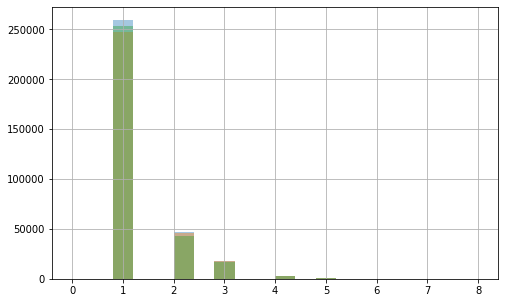

In [123]:
#распределение количества приемов в день на одного пациента.
_, ax = plt.subplots(figsize=(8, 5))

df_15[df_15['patient_id'] != -1].groupby('patient_id').TYPE_ID.count().hist(bins=20, range=(0, 8), ax=ax, alpha=0.4)
df_16[df_16['patient_id'] != -1].groupby('patient_id').TYPE_ID.count().hist(bins=20, range=(0, 8), ax=ax, alpha=0.4)
df_18[df_18['patient_id'] != -1].groupby('patient_id').TYPE_ID.count().hist(bins=20, range=(0, 8), ax=ax, alpha=0.4);

In [124]:
df_15[df_15['patient_id'] != -1].groupby('patient_id').TYPE_ID.count().value_counts(normalize=True)

1     0.790587
2     0.142124
3     0.054871
4     0.009363
5     0.002096
6     0.000579
7     0.000259
8     0.000091
9     0.000015
10    0.000009
12    0.000003
11    0.000003
Name: TYPE_ID, dtype: float64

### Распределение количества повторяющихся типов приемов на одного пациента.

Дубли пациент-тип-врач

In [125]:
df_15['is_duplicate'] = df_15[['patient_id', 'TYPE_ID', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']].duplicated().apply(lambda i : 0 if i == False else 1)
df_16['is_duplicate'] = df_16[['patient_id', 'TYPE_ID', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']].duplicated().apply(lambda i : 0 if i == False else 1)
df_18['is_duplicate'] = df_18[['patient_id', 'TYPE_ID', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']].duplicated().apply(lambda i : 0 if i == False else 1)

In [126]:
#кол-во дублей по типам приемов
df_15[df_15['is_duplicate'] == 1].TYPE_ID.value_counts()

PROCEDURE_ROOM_APPOINTMENT     11459
CONDUCTING_DIAGNOSTIC_TEST      1780
MEETING_WITH_DOCTOR             1733
MEETING_WITH_DOCTOR_AT_HOME      285
SAMPLING_BIOMATERIALS            133
MEETING_WITH_DUTY_DOCTOR         111
MOBILE_VACCINATION                79
GROUP_VACCINATION                 15
Name: TYPE_ID, dtype: int64

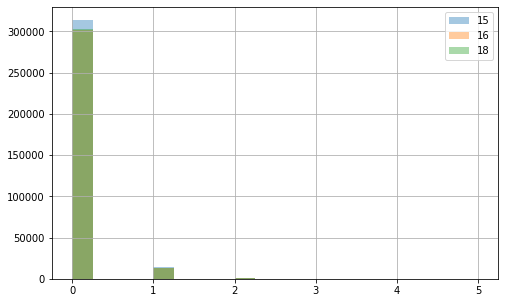

In [127]:
_, ax = plt.subplots(figsize=(8, 5))
df_15.groupby('patient_id').is_duplicate.sum().hist(bins=20, range=(0, 5), ax=ax, alpha=0.4, label='15')
df_16.groupby('patient_id').is_duplicate.sum().hist(bins=20, range=(0, 5), ax=ax, alpha=0.4, label='16')
df_18.groupby('patient_id').is_duplicate.sum().hist(bins=20, range=(0, 5), ax=ax, alpha=0.4, label='18')
plt.legend();

In [128]:
#процентное соотношение повторяющихся типов приемов пациент-тип-врач
pd.concat([df_15.groupby('patient_id').is_duplicate.sum().value_counts(normalize=True),
               df_16.groupby('patient_id').is_duplicate.sum().value_counts(normalize=True),
               df_18.groupby('patient_id').is_duplicate.sum().value_counts(normalize=True)], axis=1)\
    .set_axis(['2020-09-15', '2020-09-16', '2020-09-18'], axis=1)

,2020-09-15,2020-09-16,2020-09-18
0,0.955680,0.955739,0.955237
1,0.042474,0.042186,0.043025
2,0.001450,0.001705,0.001376
3,0.000295,0.000276,0.000290
4,0.000064,0.000067,0.000050
5,0.000012,0.000010,0.000013
6,0.000018,0.000010,0.000003
8,0.000003,NaN,0.000003
11,NaN,0.000003,NaN
13,NaN,0.000003,NaN


In [201]:
df_15['p_mr'] = df_15[['patient_id', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']].duplicated().apply(lambda i : 0 if i == False else 1)
df_16['p_mr'] = df_16[['patient_id', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']].duplicated().apply(lambda i : 0 if i == False else 1)
df_18['p_mr'] = df_18[['patient_id', 'MEDICAL_EMPLOYEE_JOB_INFO_ID']].duplicated().apply(lambda i : 0 if i == False else 1)

In [202]:
#процентное соотношение повторяющихся приемов пациент-врач
pd.concat([df_15.groupby('patient_id').p_mr.sum().value_counts(normalize=True),
               df_16.groupby('patient_id').p_mr.sum().value_counts(normalize=True),
               df_18.groupby('patient_id').p_mr.sum().value_counts(normalize=True)], axis=1)\
    .set_axis(['2020-09-15', '2020-09-16', '2020-09-18'], axis=1)

,2020-09-15,2020-09-16,2020-09-18
0,0.954514,0.954246,0.954088
1,0.043513,0.043605,0.044054
2,0.001569,0.001774,0.001490
3,0.000305,0.000279,0.000293
4,0.000064,0.000067,0.000050
5,0.000012,0.000010,0.000016
6,0.000018,0.000010,0.000003
8,0.000003,NaN,0.000003
11,NaN,0.000003,NaN
13,NaN,0.000003,NaN


# 3. Пересечение приемов у одного пациента.

In [129]:
df_15 = df_15.merge(pd.DataFrame(df_15.patient_id.value_counts())\
            .reset_index()\
            .set_axis(['patient_id', 'count'], axis=1), on='patient_id')
df_16 = df_16.merge(pd.DataFrame(df_16.patient_id.value_counts())\
            .reset_index()\
            .set_axis(['patient_id', 'count'], axis=1), on='patient_id')
df_18 = df_18.merge(pd.DataFrame(df_18.patient_id.value_counts())\
            .reset_index()\
            .set_axis(['patient_id', 'count'], axis=1), on='patient_id')

In [130]:
def intersection(t1start, t1end, t2start, t2end):
    return (t1start <= t2start <= t1end) or (t2start <= t1start <= t2end)

In [141]:
import numpy as np
df_15['intersection'] = pd.Series(np.zeros(len(df_15)))
df_15.head()

,TYPE_ID,patient_id,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,is_duplicate,count,intersection
0,MEETING_WITH_DOCTOR,30000007879933,6.02,2020-09-15 07:23:06.662,2020-09-15 07:29:08.144,16242908977,0,2,0.0
1,MEETING_WITH_DOCTOR,30000007879933,15.70,2020-09-15 06:33:46.087,2020-09-15 06:49:27.925,10146884,0,2,0.0
2,MOBILE_VACCINATION,30261608,0.13,2020-09-15 15:33:01.047,2020-09-15 15:33:08.728,12812543588,0,2,0.0
3,MOBILE_VACCINATION,30261608,0.07,2020-09-15 15:28:13.348,2020-09-15 15:28:17.72,13008065114,0,2,0.0
4,MEETING_WITH_DOCTOR,17912987,5.92,2020-09-15 15:29:24.896,2020-09-15 15:35:20.006,12367399975,0,1,0.0


In [142]:
from tqdm import tqdm

count = 0
new = []

for p_id in df_15[(df_15['count'] >= 2) & (df_15['patient_id'] != -1)].patient_id.unique():
    r = df_15[df_15['patient_id'] == p_id]
    
    for i in range(len(r)-1):
        for j in range(i+1, len(r)):
            if intersection(r.iloc[i, 3], r.iloc[i, 4], r.iloc[j, 3], r.iloc[j, 4]):
                new.append(r.iloc[i, :])
                new.append(r.iloc[j, :])
                #df_15.iloc[i, -1] = 1
                #df_15.iloc[j, -1] = 1
                count += 1
count

7042

In [150]:
new = pd.DataFrame(new).drop_duplicates()
new

,TYPE_ID,patient_id,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,is_duplicate,count,intersection
7,MEETING_WITH_DOCTOR,16961458,43.56,2020-09-15 07:50:35.805,2020-09-15 08:34:09.299,12349053712,0,2,0.0
8,CONDUCTING_DIAGNOSTIC_TEST,16961458,123.04,2020-09-15 06:40:11.923,2020-09-15 08:43:14.037,10930548623,0,2,0.0
16,MEETING_WITH_DOCTOR,30000007897276,88.00,2020-09-15 09:48:13.739,2020-09-15 11:16:13.792,7963159653,0,3,0.0
18,MEETING_WITH_DOCTOR,30000007897276,57.65,2020-09-15 10:13:57.994,2020-09-15 11:11:36.705,11460945958,0,3,0.0
73,MEETING_WITH_DOCTOR,2238567184,7.83,2020-09-15 11:36:31.251,2020-09-15 11:44:21.007,15772508757,0,2,0.0
...,...,...,...,...,...,...,...,...,...
418372,MEETING_WITH_DOCTOR,19018315,15.13,2020-09-15 11:46:28.984,2020-09-15 12:01:36.775,11627346970,0,2,0.0
423214,MEETING_WITH_DOCTOR,19027897,57.06,2020-09-15 10:42:18.819,2020-09-15 11:39:22.52,16334259118,0,2,0.0
423215,CONDUCTING_DIAGNOSTIC_TEST,19027897,0.97,2020-09-15 10:57:23.489,2020-09-15 10:58:21.686,10067770,0,2,0.0
423906,MEETING_WITH_DOCTOR,17365710,157.53,2020-09-15 05:38:49.102,2020-09-15 08:16:21.09,10363355820,0,2,0.0


In [147]:
#df_16['intersection'] = pd.Series(np.zeros(len(df_16)))

count = 0
new2 = []

for p_id in df_16[(df_16['count'] >= 2) & (df_16['patient_id'] != -1)].patient_id.unique():
    r = df_16[df_16['patient_id'] == p_id]
    
    for i in range(len(r)-1):
        for j in range(i+1, len(r)):
            if intersection(r.iloc[i, 3], r.iloc[i, 4], r.iloc[j, 3], r.iloc[j, 4]):
                new2.append(r.iloc[i, :])
                new2.append(r.iloc[j, :])
                #df_15.iloc[i, -1] = 1
                #df_15.iloc[j, -1] = 1
                count += 1
count

7540

In [152]:
new2 = pd.DataFrame(new2).drop_duplicates()
new2

,TYPE_ID,patient_id,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,is_duplicate,count
17,MEETING_WITH_DOCTOR,17417899,3.15,2020-09-16 05:41:42.055,2020-09-16 05:44:51.268,11744955842,0,6
18,MEETING_WITH_DOCTOR,17417899,15.60,2020-09-16 05:38:23.91,2020-09-16 05:53:59.763,10008983,0,6
194,MEETING_WITH_DOCTOR,18340286,20.32,2020-09-16 05:00:34.209,2020-09-16 05:20:53.355,11956842103,0,2
195,PROCEDURE_ROOM_APPOINTMENT,18340286,2.95,2020-09-16 05:20:25.339,2020-09-16 05:23:22.54,11745669402,0,2
197,PROCEDURE_ROOM_APPOINTMENT,2239176412,3.02,2020-09-16 07:30:24.874,2020-09-16 07:33:26.053,16297442258,0,6
...,...,...,...,...,...,...,...,...
406014,SAMPLING_BIOMATERIALS,30000000735017,0.29,2020-09-16 06:59:30.403,2020-09-16 06:59:47.725,48364787,1,2
406246,MEETING_WITH_DOCTOR,18225730,24.41,2020-09-16 11:15:01.326,2020-09-16 11:39:25.642,10115896,0,2
406247,MEETING_WITH_DOCTOR,18225730,11.13,2020-09-16 11:36:45.541,2020-09-16 11:47:53.493,7502088138,0,2
406820,CONDUCTING_DIAGNOSTIC_TEST,17286583,2.23,2020-09-16 06:44:43.37,2020-09-16 06:46:57.138,15815169220,0,2


In [153]:
count = 0
new3 = []

for p_id in df_18[(df_18['count'] >= 2) & (df_18['patient_id'] != -1)].patient_id.unique():
    r = df_18[df_18['patient_id'] == p_id]
    
    for i in range(len(r)-1):
        for j in range(i+1, len(r)):
            if intersection(r.iloc[i, 3], r.iloc[i, 4], r.iloc[j, 3], r.iloc[j, 4]):
                new3.append(r.iloc[i, :])
                new3.append(r.iloc[j, :])
                #df_15.iloc[i, -1] = 1
                #df_15.iloc[j, -1] = 1
                count += 1
count

6839

In [154]:
new3 = pd.DataFrame(new3).drop_duplicates()
new3

,TYPE_ID,patient_id,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,is_duplicate,count
54,MEETING_WITH_DOCTOR,10171671,29.96,2020-09-18 10:55:40.191,2020-09-18 11:25:37.711,158360612,0,3
55,PROCEDURE_ROOM_APPOINTMENT,10171671,2.78,2020-09-18 11:18:01.492,2020-09-18 11:20:48.293,171320712,1,3
72,MEETING_WITH_DOCTOR,30000007962525,1.45,2020-09-18 09:30:07.479,2020-09-18 09:31:34.693,14986516710,0,5
73,MEETING_WITH_DOCTOR,30000007962525,412.31,2020-09-18 09:11:01.124,2020-09-18 16:03:19.695,10003023,0,5
75,MEETING_WITH_DOCTOR,30000007962525,6.51,2020-09-18 09:36:24.967,2020-09-18 09:42:55.36,12071596,0,5
...,...,...,...,...,...,...,...,...
396031,MEETING_WITH_DOCTOR,23304940,10.52,2020-09-18 13:25:27.489,2020-09-18 13:35:58.535,7715324202,0,2
401942,CONDUCTING_DIAGNOSTIC_TEST,30000007781059,10.82,2020-09-18 11:56:59.387,2020-09-18 12:07:48.856,11374592,0,2
401943,MEETING_WITH_DOCTOR,30000007781059,268.55,2020-09-18 08:17:28.873,2020-09-18 12:46:01.871,121154137,0,2
402414,CONDUCTING_DIAGNOSTIC_TEST,19813862,25.32,2020-09-18 06:02:03.17,2020-09-18 06:27:22.577,10228943965,0,2


In [162]:
data_18[data_18['patient_id'] == 30000007962525]

,ID,TYPE_ID,type_name,patient_id,CURRENT_STATUS_ID,STATUS,DURATION,START_DATE,FINISH_DATE,MEDICAL_EMPLOYEE_JOB_INFO_ID,ENTRY_ID,RESOURCE_ID,resource_type
43,94270858,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",30000007962525,225421371,FINISHED,15.39,2020-09-18 08:47:25.204,2020-09-18 09:02:48.335,8221474887,2.322243e+11,16725225,AVAILABLE_RESOURCE
95490,94302102,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",30000007962525,225467176,FINISHED,1.45,2020-09-18 09:30:07.479,2020-09-18 09:31:34.693,14986516710,NaN,18712120637,AVAILABLE_RESOURCE
171192,94288913,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",30000007962525,226035457,FINISHED,412.31,2020-09-18 09:11:01.124,2020-09-18 16:03:19.695,10003023,2.322242e+11,10407169,AVAILABLE_RESOURCE
262837,94555177,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",30000007962525,226071635,FINISHED,20.87,2020-09-18 16:28:33.911,2020-09-18 16:49:26.042,15788125547,2.322240e+11,17829145,AVAILABLE_RESOURCE
280329,94307194,MEETING_WITH_DOCTOR,"Прием пациента врачом-клиницистом (фельдшером,...",30000007962525,225487445,FINISHED,6.51,2020-09-18 09:36:24.967,2020-09-18 09:42:55.36,12071596,2.322244e+11,11413689,AVAILABLE_RESOURCE


In [156]:
new.patient_id.nunique() / df_15.patient_id.nunique()

0.01713577343985575

In [160]:
new.patient_id.nunique()

5626

In [159]:
new.TYPE_ID.value_counts()

MEETING_WITH_DOCTOR            7334
CONDUCTING_DIAGNOSTIC_TEST     2034
PROCEDURE_ROOM_APPOINTMENT     1755
SAMPLING_BIOMATERIALS           560
MEETING_WITH_DUTY_DOCTOR        434
MEETING_WITH_DOCTOR_AT_HOME     188
MOBILE_VACCINATION              159
GROUP_VACCINATION                35
MEETING_WITH_NURSE_IN_CE          4
Name: TYPE_ID, dtype: int64

In [157]:
new2.patient_id.nunique() / df_16.patient_id.nunique()

0.018624664531072265

In [158]:
new3.patient_id.nunique() / df_18.patient_id.nunique()

0.017333249354412043